In [8]:
!nvidia-smi

Mon May 27 21:59:47 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
!pip install nltk


In [ ]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 17.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 22.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 16.0 MB/s eta 0:00:00


In [ ]:
import json

# Load the JSON file
with open('/content/arxiv-metadata-oai-snapshot.json', 'r') as f:
    try:
        data = json.load(f)
        print("JSON file loaded successfully.")
    except json.JSONDecodeError as e:
        print("JSON decoding error:", e)


JSON decoding error: Extra data: line 2 column 1 (char 1689)


In [ ]:
import pandas as pd


data = pd.read_json('/content/arxiv-metadata-oai-snapshot.json', lines=True)

# Analyze unique categories
category_counts = data['categories'].value_counts()

print("Categories and their counts:")
category_counts_df = pd.DataFrame({'Category': category_counts.index, 'Count': category_counts.values})
#print(category_counts_df.head(50))
unique_categories = data['categories'].unique()
print(unique_categories)

Categories and their counts:
['hep-ph' 'math.CO cs.CG' 'physics.gen-ph' ... 'math.NA stat.AP stat.CO'
 'math.HO math.FA' 'cs.IT cs.CC math.IT math.PR quant-ph']


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')

nltk.download('punkt')
nltk.download('wordnet')
# Function to preprocess text
def preprocess_text(texts):
    preprocessed_texts = []
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()

    for text in texts:
        # Tokenize text
        words = word_tokenize(text)
        # Remove stopwords and non-alphabetic characters
        words = [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words]
        # Lemmatize words
        words = [lemmatizer.lemmatize(word) for word in words]
        preprocessed_texts.append(' '.join(words))

    return preprocessed_texts

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
data = pd.read_json('/content/arxiv-metadata-oai-snapshot.json', lines=True)

# Analyze unique categories
unique_categories = data['categories'].unique()
print(unique_categories)
# Create a dictionary to store clusters
category_clusters = {}

# Preprocess the data
preprocessed_abstracts = preprocess_text(data['abstract'])

['hep-ph' 'math.CO cs.CG' 'physics.gen-ph' ... 'math.NA stat.AP stat.CO'
 'math.HO math.FA' 'cs.IT cs.CC math.IT math.PR quant-ph']


In [ ]:
for category in unique_categories:
    # Filter documents belonging to the current category
    category_data = data[data['categories'] == category]
    category_indices = category_data.index
    category_abstracts = [preprocessed_abstracts[i] for i in category_indices]

    # Feature extraction (TF-IDF)
    vectorizer = TfidfVectorizer()
    abstract_vectors = vectorizer.fit_transform(category_abstracts)

    # Clustering
    num_clusters = 1  # Assuming each category forms a single cluster
    kmeans = KMeans(n_clusters=num_clusters)
    clusters = kmeans.fit_predict(abstract_vectors)

    # Organize abstracts into clusters
    category_clusters[category] = [data.iloc[category_indices[i]]['abstract'] for i, cluster_id in enumerate(clusters)]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
for category, abstracts in category_clusters.items():
    print(f"{category}: {len(abstracts)} abstracts")

hep-ph: 2522 abstracts
math.CO cs.CG: 1 abstracts
physics.gen-ph: 356 abstracts
math.CO: 415 abstracts
math.CA math.FA: 21 abstracts
cond-mat.mes-hall: 819 abstracts
gr-qc: 931 abstracts
cond-mat.mtrl-sci: 968 abstracts
astro-ph: 7849 abstracts
math.NT math.AG: 90 abstracts
math.NT: 366 abstracts
math.CA math.AT: 1 abstracts
hep-th: 1768 abstracts
math.PR math.AG: 1 abstracts
hep-ex: 702 abstracts
nlin.PS physics.chem-ph q-bio.MN: 1 abstracts
math.NA: 83 abstracts
nlin.PS: 78 abstracts
cond-mat.str-el cond-mat.stat-mech: 62 abstracts
math.RA: 115 abstracts
math.CA math.PR: 5 abstracts
cond-mat.str-el: 661 abstracts
physics.optics physics.comp-ph: 13 abstracts
q-bio.PE q-bio.CB quant-ph: 1 abstracts
q-bio.QM q-bio.MN: 10 abstracts
hep-ph hep-lat nucl-th: 7 abstracts
math.OA math.FA: 50 abstracts
math.QA math-ph math.MP: 27 abstracts
physics.gen-ph quant-ph: 9 abstracts
cond-mat.stat-mech cond-mat.mtrl-sci: 36 abstracts
astro-ph nlin.CD physics.plasm-ph physics.space-ph: 1 abstracts
nlin

In [ ]:
for category, abstracts in category_clusters.items():
    with open(f"{category}_cluster.txt", "w") as f:
        for abstract in abstracts:
            f.write(abstract + "\n")

In [ ]:
# Save all clusters in a single text file
with open("ALL_clusters.txt", "w") as f:
    for category, abstracts in category_clusters.items():
        f.write(f"{category}:{abstracts}\n")


In [ ]:
import matplotlib.pyplot as plt

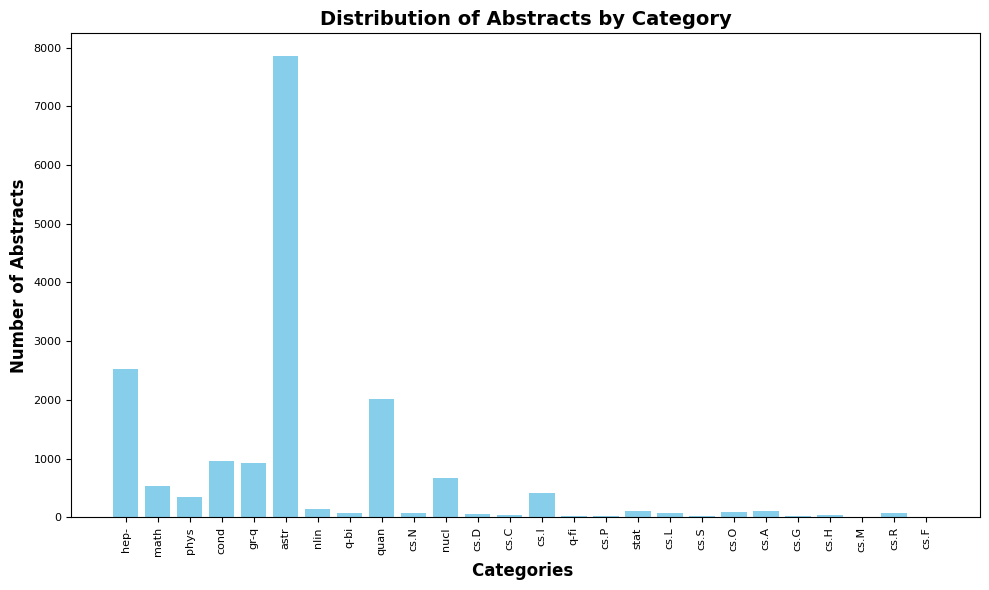

In [ ]:
import matplotlib.pyplot as plt

# Create a dictionary to store the count of abstracts in each category
category_counts = {}

for category, abstracts in category_clusters.items():
    category_counts[category] = len(abstracts)

# Extract the first three letters of each category for x-axis labels
short_category_names = [category[:4] for category in category_counts.keys()]

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(short_category_names, category_counts.values(), color='skyblue')
plt.xlabel('Categories ', fontsize=12, fontweight='bold')
plt.ylabel('Number of Abstracts', fontsize=12, fontweight='bold')
plt.title('Distribution of Abstracts by Category', fontsize=14, fontweight='bold')
plt.xticks(rotation=90, fontsize=8)
plt.yticks(fontsize=8)
#plt.ylim(0, 2000)
plt.tight_layout()
plt.show()


**Domain specific catagories mapping**

In [3]:

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')

nltk.download('punkt')
nltk.download('wordnet')

def preprocess_text(texts):
    preprocessed_texts = []
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()

    for text in texts:
        # Tokenize text
        words = word_tokenize(text)
        # Remove stopwords and non-alphabetic characters
        words = [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words]
        # Lemmatize words
        words = [lemmatizer.lemmatize(word) for word in words]
        preprocessed_texts.append(' '.join(words))

    return preprocessed_texts

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [9]:
data = pd.read_json('/content/arxiv-metadata-oai-snapshot.json', lines=True)

# Preprocess the data
preprocessed_abstracts = preprocess_text(data['abstract'])


In [10]:
unique_categories = data['categories'].unique()

# Create a dictionary to store clusters
domain_clusters = {}

In [11]:
domain_wise_categories = {
    "Mathematics": [
        "math.AG", "math.AT", "math.AP", "math.CT", "math.CA", "math.CO",
        "math.AC", "math.CV", "math.DG", "math.DS", "math.FA", "math.GM",
        "math.GN", "math.GT", "math.GR", "math.HO", "math.IT", "math.KT",
        "math.LO", "math.MP", "math.MG", "math.NT", "math.NA", "math.OA",
        "math.OC", "math.PR", "math.QA", "math.RT", "math.RA", "math.SP",
        "math.ST", "math.SG"
    ],
    "Computer Science": [
        "cs.AI","cs.CL","cs.CC","cs.CE","cs.CG","cs.GT","cs.CV","cs.CY","cs.CR","cs.DS",
        "cs.DB","cs.DL","cs.DM","cs.DC","cs.ET","cs.FL","cs.GL","cs.GR","cs.AR","cs.HC",
        "cs.IR","cs.IT","cs.LO","cs.LG","cs.MS","cs.MA","cs.MM","cs.NI","cs.NE","cs.NA",
        "cs.OS","cs.OH","cs.PF","cs.PL","cs.RO","cs.SI","cs.SE","cs.SD","cs.SC","cs.SY"
    ],
    "Physics": [
        "physics.acc-ph", "physics.app-ph","physics.ao-ph","physics.atom-ph","physics.atm-clus",
        "physics.bio-ph","physics.chem-ph","physics.class-ph","physics.comp-ph","physics.data-an",
        "physics.flu-dyn","physics.gen-ph","physics.geo-ph","physics.hist-ph","physics.ins-ph",
        "physics.med-ph","physics.optics -ph","physics.ed-ph","physics.soc-ph","physics.plasm-ph",
        "physics.pop-ph","physics.space-ph"
    ],
    "Chemistry": [
        "nlin.AO","nlin.CG","nlin.CD","nlin.SI","nlin.PS"

    ],
    "Statistics": [
        "stat.AP","stat.CO","stat.ML","stat.ME","stat.OT","stat.TH",
    ],
    "Biology": [
       "q-bio.BM","q-bio.CB","q-bio.GN","q-bio.MN","q-bio.CB","q-bio.NC","q-bio.OT","q-bio.PE","q-bio.QM","q-bio.SC",
       "q-bio.TO"
    ]
}


In [12]:
import os
os.makedirs("clusters", exist_ok=True)
for domain, categories in domain_wise_categories.items():
    domain_abstracts = []

    # Filter abstracts belonging to the current domain
    for category in categories:
        if category in unique_categories:
            category_indices = data[data['categories'] == category].index
            category_abstracts = [preprocessed_abstracts[i] for i in category_indices]
            domain_abstracts.extend(category_abstracts)

    # Feature extraction (TF-IDF)
    vectorizer = TfidfVectorizer()
    abstract_vectors = vectorizer.fit_transform(domain_abstracts)

    # Clustering
    num_clusters = len(categories)  
    kmeans = KMeans(n_clusters=num_clusters)
    clusters = kmeans.fit_predict(abstract_vectors)

    # Organize abstracts into clusters
    domain_clusters[domain] = []
    for i in range(num_clusters):
        cluster_abstracts = [domain_abstracts[j] for j in range(len(domain_abstracts)) if clusters[j] == i]
        domain_clusters[domain].extend(cluster_abstracts)

    cluster_file_path = f"clusters/{domain}_cluster.txt"
    with open(cluster_file_path, "w") as cluster_file:
        for abstract in domain_clusters[domain]:
            cluster_file.write(abstract + "\n")


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [13]:
for domain, abstracts in domain_clusters.items():
    print(f"{domain}: {len(abstracts)} abstracts")
    with open(f"clusters/{domain}_cluster.txt", "w") as f:
        for abstract in abstracts:
            f.write(abstract + "\n")
    print()

Mathematics: 4598 abstracts

Computer Science: 1057 abstracts

Physics: 1397 abstracts

Chemistry: 347 abstracts

Statistics: 192 abstracts

Biology: 276 abstracts



In [ ]:
# Print and save the clusters
for domain, category_clusters in domain_clusters.items():
    print(f"{domain} categories:")
    for category, abstracts in category_clusters.items():
        print(f"  {category}: {len(abstracts)} abstracts")
        with open(f"{domain}_{category}_cluster.txt", "w") as f:
            for abstract in abstracts:
                f.write(abstract + "\n")
    print()

Mathematics categories:
  math.AG: 100 abstracts
  math.AT: 203 abstracts
  math.AP: 113 abstracts
  math.CT: 86 abstracts
  math.CA: 151 abstracts
  math.CO: 166 abstracts
  math.AC: 109 abstracts
  math.CV: 168 abstracts
  math.DG: 97 abstracts
  math.DS: 84 abstracts
  math.FA: 93 abstracts
  math.GM: 172 abstracts
  math.GN: 19 abstracts
  math.GT: 122 abstracts
  math.GR: 93 abstracts
  math.HO: 124 abstracts
  math.IT: 104 abstracts
  math.KT: 141 abstracts
  math.LO: 195 abstracts
  math.MP: 58 abstracts
  math.MG: 969 abstracts
  math.NT: 66 abstracts
  math.NA: 243 abstracts
  math.OA: 45 abstracts
  math.OC: 34 abstracts
  math.PR: 115 abstracts
  math.QA: 150 abstracts
  math.RT: 122 abstracts
  math.RA: 86 abstracts
  math.SP: 201 abstracts
  math.ST: 130 abstracts
  math.SG: 39 abstracts

Computer Science categories:
  cs.AI: 23 abstracts
  cs.CL: 16 abstracts
  cs.CC: 39 abstracts
  cs.CE: 21 abstracts
  cs.CG: 28 abstracts
  cs.GT: 29 abstracts
  cs.CV: 20 abstracts
  cs

In [ ]:
import os
os.makedirs("clusters", exist_ok=True)

for domain, categories in domain_wise_categories.items():
    domain_abstracts = []

    # Filter abstracts belonging to the current domain
    for category in categories:
        if category in unique_categories:
            category_indices = data[data['categories'] == category].index
            category_abstracts = [preprocessed_abstracts[i] for i in category_indices]
            domain_abstracts.extend(category_abstracts)

    # Feature extraction (TF-IDF)
    vectorizer = TfidfVectorizer()
    abstract_vectors = vectorizer.fit_transform(domain_abstracts)

    # Clustering
    num_clusters = len(categories) 
    kmeans = KMeans(n_clusters=num_clusters)
    clusters = kmeans.fit_predict(abstract_vectors)

    # Organize abstracts into clusters and save them to text files
    domain_clusters[domain] = {}
    for i, category in enumerate(categories):
        cluster_abstracts = [domain_abstracts[j] for j in range(len(domain_abstracts)) if clusters[j] == i]
        domain_clusters[domain][category] = cluster_abstracts

        # Save each cluster's abstracts to a text file
        cluster_file_path = f"clusters/{domain}_{category}_cluster.txt"
        with open(cluster_file_path, "w") as cluster_file:
            for abstract in cluster_abstracts:
                cluster_file.write(abstract + "\n")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# Save all clusters in a single text file with counts and abstracts
with open("ALL_clusters.txt", "w") as f:
    for domain, category_clusters in domain_clusters.items():
        f.write(f"{domain} categories:\n")
        for category, abstracts in category_clusters.items():
            f.write(f"  {category}: {len(abstracts)} abstracts\n")
            f.write("\n")
            for abstract in abstracts:
                f.write(abstract + "\n\n")
        f.write("\n")
